In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import keras.backend as K
from keras import Input, layers
from keras.models import Model
import scipy as sy


2023-12-12 15:26:34.539247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 15:26:34.539487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 15:26:34.715828: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 15:26:35.090468: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-12 15:26:39.482366: W tensorflow/compiler/tf2

In [2]:
((x_trian,y_train),(x_test,y_test))=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
vcol_1=np.ones((28,28))
vcol_1[:,::2,]=0

In [4]:
vcol_2=np.ones((28,28))

In [5]:
vcol_2.diagonal(offset=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
rows, cols = np.where(np.eye(*vcol_2.shape, k=0))

In [7]:
vcol_2[rows, cols]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
rows

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [49]:
for i in range(-len(vcol_2)//2,len(vcol_2)//2):   
    rows, cols = np.where(np.eye(*vcol_2.shape, k=2*i))
    vcol_2[rows, cols]=0

In [83]:
layer_conv=tf.keras.layers.Conv2D(32,7)
image_conv=layer_conv(img_1/255.)

In [85]:
image_conv=tf.reshape(image_conv,(22,22,32))

In [86]:
image_conv.shape

TensorShape([22, 22, 32])

In [7]:
vcol_2

array([[0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1

In [75]:
img1=x_trian[0,:,:]

In [85]:
vcol=np.zeros((7,7))
vcol[:,3]=1

In [29]:
def my_filter_1(shape, dtype=None):

    f = np.array([
            [[[0]], [[0]], [[1]],[[0]],[[0]]],
            [[[0]], [[0]], [[1]],[[0]],[[0]]],
            [[[0]], [[0]], [[1]],[[0]],[[0]]],
            [[[0]], [[0]], [[1]],[[0]],[[0]]],
            [[[0]], [[0]], [[1]],[[0]],[[0]]]
        ])
    assert f.shape == shape
    return K.variable(f, dtype='float32')

In [31]:
def my_filter_2(shape, dtype=None):

    f = np.array([
            [[[0]], [[0]], [[0]],[[0]],[[0]]],
            [[[0]], [[0]], [[0]],[[0]],[[0]]],
            [[[1]], [[1]], [[1]],[[1]],[[1]]],
            [[[0]], [[0]], [[0]],[[0]],[[0]]],
            [[[0]], [[0]], [[0]],[[0]],[[0]]]
        ])
    assert f.shape == shape
    return K.variable(f, dtype='float32')

In [38]:
def my_filter_3(shape, dtype=None):

    f = np.array([
            [[[0]], [[0]], [[1]],[[0]],[[0]]],
            [[[0]], [[0]], [[-4]],[[0]],[[0]]],
            [[[1]], [[-4]], [[12]],[[-4]],[[1]]],
            [[[0]], [[0]], [[-4]],[[0]],[[0]]],
            [[[0]], [[0]], [[1]],[[0]],[[0]]]
        ])
    assert f.shape == shape
    return K.variable(f, dtype='float32')

In [39]:
def my_filter_4(shape, dtype=None):

    f = np.array([
            [[[0]], [[0]], [[-1]],[[0]],[[0]]],
            [[[0]], [[0]], [[-1]],[[0]],[[0]]],
            [[[-1]], [[-1]], [[8]],[[-1]],[[-1]]],
            [[[0]], [[0]], [[-1]],[[0]],[[0]]],
            [[[0]], [[0]], [[-1]],[[0]],[[0]]]
        ])
    assert f.shape == shape
    return K.variable(f, dtype='float32')

In [21]:
def my_filter_5(shape, dtype=None):

    f = np.array([
            [[[8]], [[-5]], [[0]],[[0]],[[0]]],
            [[[-5]], [[8]], [[-5]],[[0]],[[0]]],
            [[[0]], [[-5]], [[8]],[[-5]],[[0]]],
            [[[0]], [[0]], [[-5]],[[8]],[[-5]]],
            [[[0]], [[0]], [[0]],[[-5]],[[8]]]
        ])
    assert f.shape == shape
    return K.variable(f, dtype='float32')

In [20]:
def my_filter_6(shape, dtype=None):

    f = np.array([
            [[[0]], [[0]], [[0]],[[-5]],[[8]]],
            [[[0]], [[0]], [[-5]],[[8]],[[-5 ]]],
            [[[0]], [[-5]], [[8]],[[-5]],[[0]]],
            [[[-5]], [[8]], [[-5]],[[0]],[[0]]],
            [[[8]], [[-5]], [[0]],[[0]],[[0]]]
        ])
    assert f.shape == shape
    return K.variable(f, dtype='float32')

In [78]:
img_1=img1.reshape(1, 28,28,1)
vcol_2=vcol_2.reshape(1, 28,28,1)

In [42]:
def build_model():
    input_tensor = Input(shape=(28,28,1))

    x = layers.Conv2D(filters=1, 
                      kernel_size = 5,
                      kernel_initializer=my_filter_4,
                      strides=1, 
                      padding="same") (input_tensor)

    model = Model(inputs=input_tensor, outputs=x)
    return model

In [43]:
model = build_model()
out_44 = model.predict(vcol_2)

1/1 [==============================] - 0s 87ms/step


In [17]:
out.shape

NameError: name 'out' is not defined

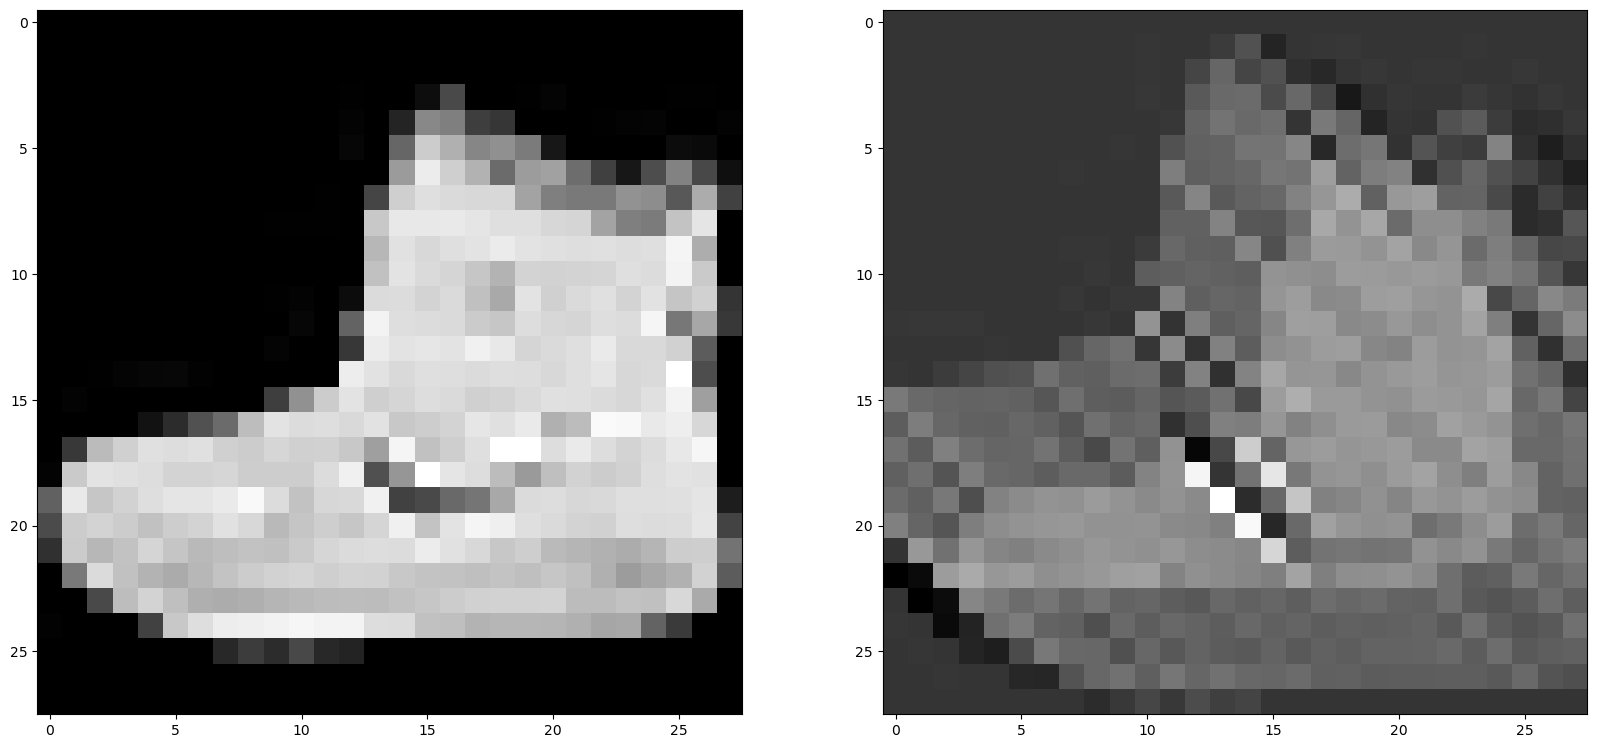

In [166]:
fig, axe = plt.subplots(1,2)
fig.set_size_inches(20,10)
axe[0].imshow(img1,cmap='gray')
axe[1].imshow(out_88.reshape(28,28),cmap='gray')

plt.show()

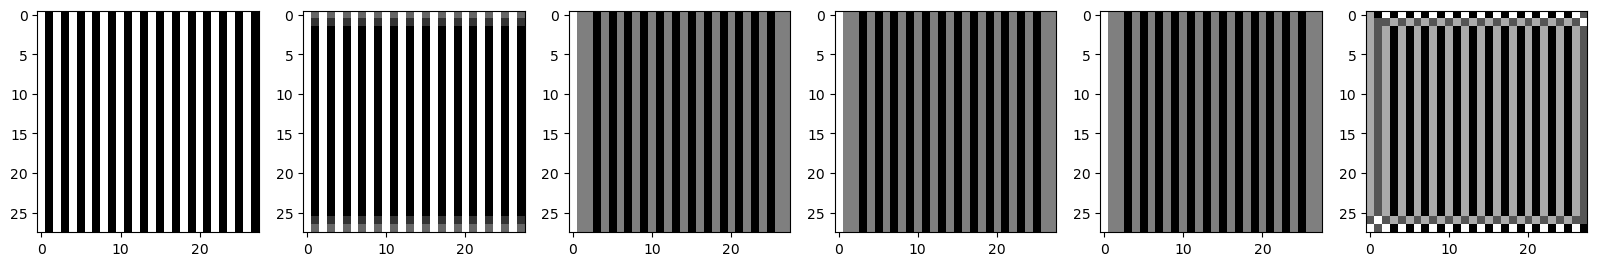

In [163]:
fig, axe = plt.subplots(1,6)
fig.set_size_inches(20,10)
axe[0].imshow(vcol_1.reshape(28,28),cmap='gray_r',vmin=vcol_1.reshape(28,28).min(),vmax=vcol_1.reshape(28,28).max())
axe[1].imshow(out_1.reshape(28,28),cmap='gray_r',vmin=out_1.reshape(28,28).min(),vmax=out_1.reshape(28,28).max())
axe[2].imshow(out_2.reshape(28,28),cmap='gray_r',vmin=out_2.reshape(28,28).min(),vmax=out_2.reshape(28,28).max())
axe[3].imshow(out_3.reshape(28,28),cmap='gray_r',vmin=out_3.reshape(28,28).min(),vmax=out_3.reshape(28,28).max())
axe[4].imshow(out_4.reshape(28,28),cmap='gray_r',vmin=out_4.reshape(28,28).min(),vmax=out_4.reshape(28,28).max())
axe[5].imshow(out_5.reshape(28,28),cmap='gray_r',vmin=out_5.reshape(28,28).min(),vmax=out_5.reshape(28,28).max())

plt.show()

In [249]:
(out_77.reshape(28,28)[:,0]/out_77.max()).sum()

1.5000002

In [250]:
(out_88.reshape(28,28)[:,0]/out_88.max()).sum()

1.2000004

In [244]:
np.all(out_77/out_77.max()==out_88/out_88.max())

False

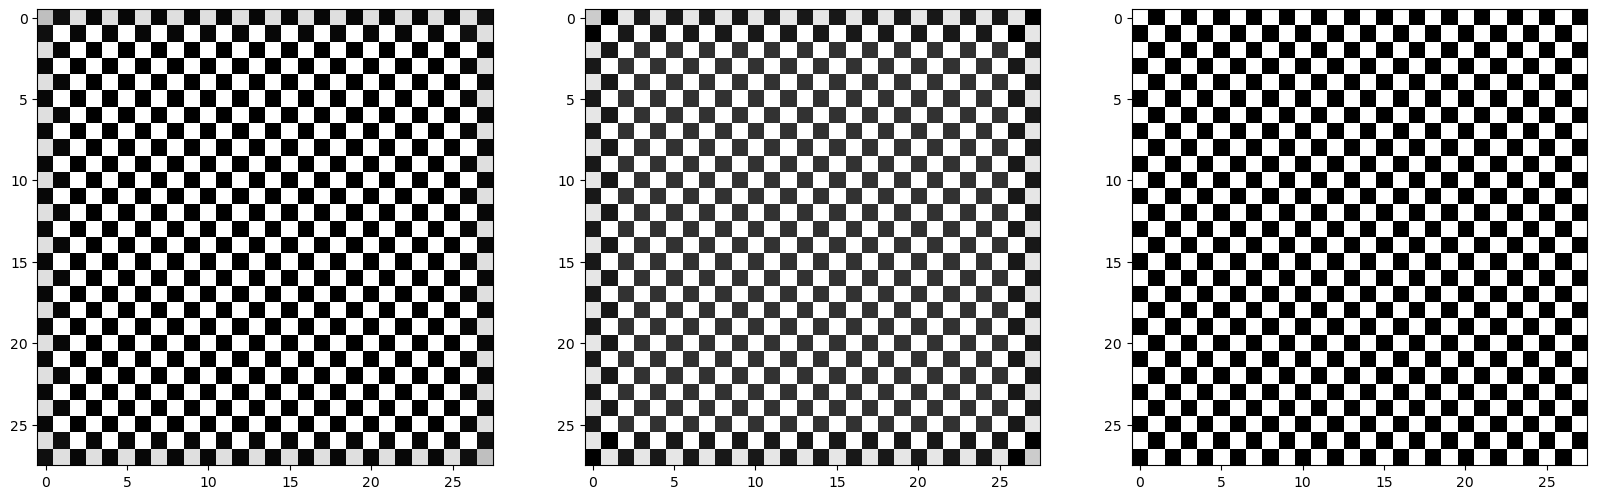

In [45]:
fig, axe = plt.subplots(1,3)
fig.set_size_inches(20,10)
#axe[0].imshow(out_77.reshape(28,28),cmap='gray_r',vmin=out_77.reshape(28,28).min(),vmax=out_77.reshape(28,28).max())
#axe[1].imshow(out_88.reshape(28,28),cmap='gray_r',vmin=out_88.reshape(28,28).min(),vmax=out_88.reshape(28,28).max())
#axe[2].imshow(out_11.reshape(28,28),cmap='gray_r',vmin=out_11.reshape(28,28).min(),vmax=out_11.reshape(28,28).max())
#axe[3].imshow(out_22.reshape(28,28),cmap='gray_r',vmin=out_22.reshape(28,28).min(),vmax=out_22.reshape(28,28).max())
axe[0].imshow(out_33.reshape(28,28),cmap='gray_r',vmin=out_33.reshape(28,28).min(),vmax=out_33.reshape(28,28).max())
axe[1].imshow(out_44.reshape(28,28),cmap='gray_r',vmin=out_44.reshape(28,28).min(),vmax=out_44.reshape(28,28).max())
axe[2].imshow(vcol_2.reshape(28,28),cmap='gray_r',vmin=vcol_2.reshape(28,28).min(),vmax=vcol_2.reshape(28,28).max())
plt.show()

In [154]:
out_5.reshape(28,28)[0,:]

array([ 0.,  4., -2.,  4., -2.,  4., -2.,  4., -2.,  4., -2.,  4., -2.,
        4., -2.,  4., -2.,  4., -2.,  4., -2.,  4., -2.,  4., -2.,  4.,
       -2.,  2.], dtype=float32)

In [139]:
out_1.reshape(28,28).max()

5.0

In [93]:
for i in range(4):
    for j in range(8):
        print(8*i+j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


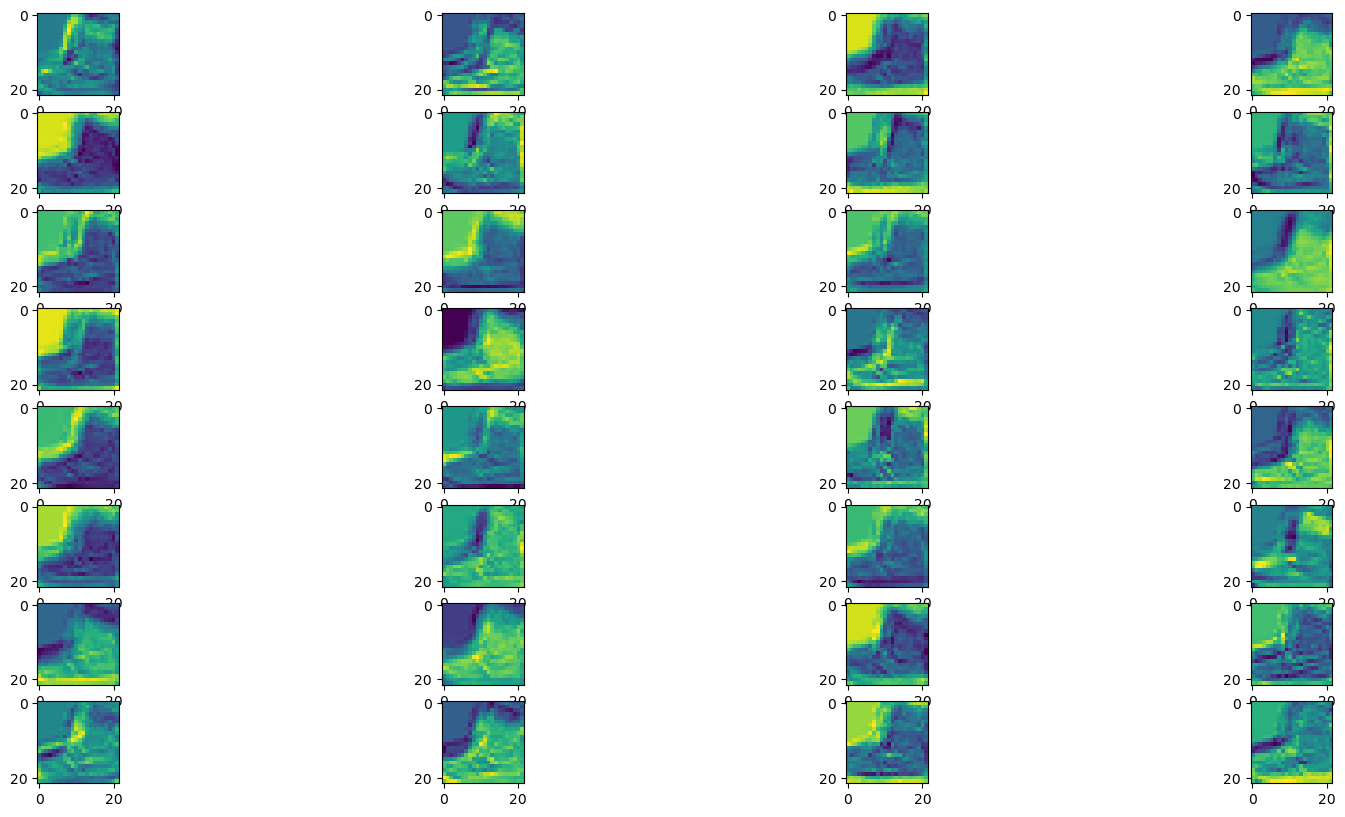

In [94]:
fig ,axe=plt.subplots(8,4)
fig.set_size_inches(20,10)
for j in range(0,8):
    for i in range(0,4):
        axe[j%8,i%4].imshow(image_conv[0:22,0:22,4*j+i])

plt.show()

    


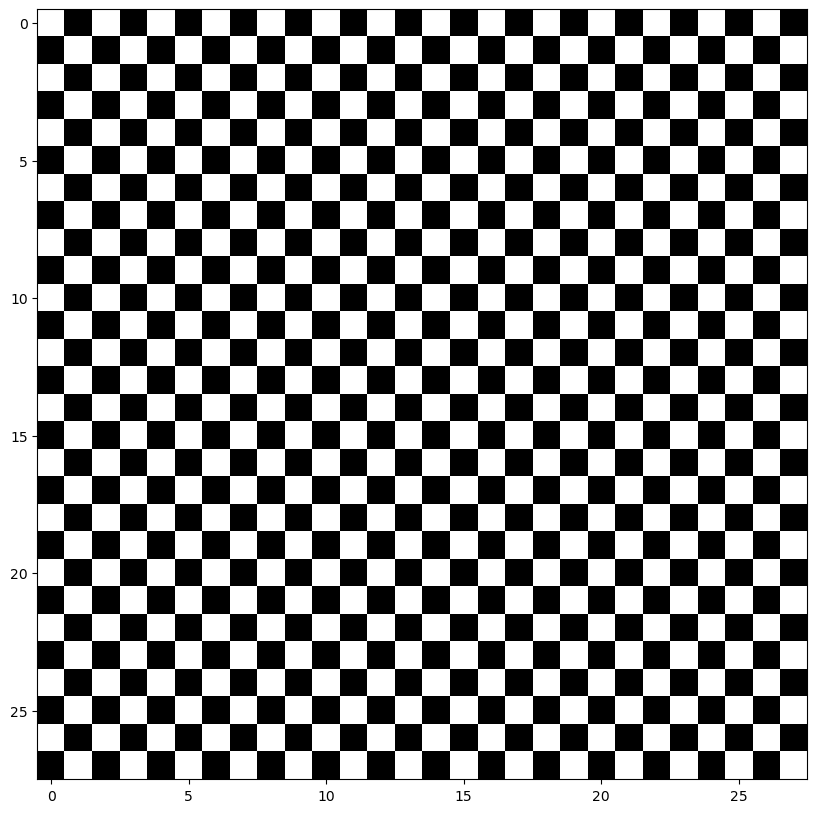

In [228]:
fig, axe = plt.subplots(1,1)
fig.set_size_inches(20,10)
axe.imshow(vcol_2.reshape(28,28),cmap='gray_r',vmin=vcol_2.reshape(28,28).min(),vmax=vcol_1.reshape(28,28).max())
plt.show()